# Import required libraries

In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Dataset import

## Train set

In [51]:
train_df = pd.read_csv(os.path.join('./', 'train.csv'))

In [52]:
train_df.head()

,Timestamp,main_air_press,main_motor_curr,metal_oil_supply_press_contr,metal_oil_supply_press_cut,metal_temp_control,metal_temp_cut,oil_supply_press,output_count_sum,status,tongs_cast_curr,tongs_cast_set_freq,trans_pos_down,trans_pos_left,trans_pos_right,trans_pos_up,work_oil_supply_press
0,2022-05-12 20:01:51,2591.20,4099.0,278.300,231.900,43.0,43.0,472.111,122337.0,2.0,0.0,6000.0,638.800,796.857,1729.50,948.600,1861.10
1,2022-05-12 20:01:52,2597.40,5764.0,280.100,240.900,NaN,NaN,475.300,122342.0,2.0,NaN,NaN,638.714,797.000,1729.90,948.555,1852.60
2,2022-05-12 20:01:53,2593.40,4007.0,291.100,236.700,NaN,NaN,466.125,122347.0,2.0,NaN,NaN,637.100,797.333,1729.50,947.100,1846.60
3,2022-05-12 20:01:54,2592.33,5346.0,280.222,225.777,NaN,NaN,474.111,122352.0,2.0,NaN,NaN,638.800,796.875,1729.87,948.700,1855.25
4,2022-05-12 20:01:55,2592.83,4245.0,278.100,243.900,NaN,NaN,479.500,122357.0,2.0,NaN,NaN,637.666,797.250,1730.00,947.400,1853.80


In [53]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Timestamp                     30000 non-null  object 
 1   main_air_press                30000 non-null  float64
 2   main_motor_curr               29290 non-null  float64
 3   metal_oil_supply_press_contr  29966 non-null  float64
 4   metal_oil_supply_press_cut    29963 non-null  float64
 5   metal_temp_control            137 non-null    float64
 6   metal_temp_cut                93 non-null     float64
 7   oil_supply_press              29991 non-null  float64
 8   output_count_sum              22158 non-null  float64
 9   status                        30000 non-null  float64
 10  tongs_cast_curr               32 non-null     float64
 11  tongs_cast_set_freq           5 non-null      float64
 12  trans_pos_down                23340 non-null  float64
 13  t

- Timestamp (측정시간): 데이터가 기록된 시간.
- main_air_press (메인 에어 입력): 설비의 주요 공기 압력 입력 값.
- main_motor_curr (메인 모터 전류): 메인 모터의 전류 소비량.
- metal_oil_supply_press_contr (어깨 메탈 오일공급 압력 조작측): 조작측 어깨 메탈에 공급되는 오일 압력.
- metal_oil_supply_press_cut (어깨 메탈 오일공급 압력 절단측): 절단측 어깨 메탈에 공급되는 오일 압력.
- metal_temp_control (어깨 메탈 온도 조작측): 조작측 어깨 메탈의 온도.
- metal_temp_cut (어깨 메탈 온도 절단측): 절단측 어깨 메탈의 온도.
- oil_supply_press (윤활유 공급 압력): 설비에 공급되는 윤활유의 압력.
- output_count_sum (일일 누적 생산량): 하루 동안 생산된 제품의 총 개수.
- status (설비상태): 설비의 작동 상태 (0, 1, 2로 구분, 예: 가동, 대기, 정지 등).
- tongs_cast_curr (집게틀 전류): 집게틀(재료를 잡는 장치)의 전류 소비량.
- tongs_cast_set_freq (집게틀 설정 주파수): 집게틀의 설정된 동작 주파수.
- trans_pos_down (재료 트랜스퍼 변위 down): 재료 이송 장치의 아래쪽 변위.
- trans_pos_left (재료 트랜스퍼 변위 left): 재료 이송 장치의 왼쪽 변위.
- trans_pos_right (재료 트랜스퍼 변위 right): 재료 이송 장치의 오른쪽 변위.
- trans_pos_up (재료 트랜스퍼 변위 up): 재료 이송 장치의 위쪽 변위.
- work_oil_supply_press (가공유 공급 압력): 가공유(냉간단조 시 사용되는 오일)의 공급 압력.

### EDA

In [54]:
train_df.describe()

,main_air_press,main_motor_curr,metal_oil_supply_press_contr,metal_oil_supply_press_cut,metal_temp_control,metal_temp_cut,oil_supply_press,output_count_sum,status,tongs_cast_curr,tongs_cast_set_freq,trans_pos_down,trans_pos_left,trans_pos_right,trans_pos_up,work_oil_supply_press
count,30000.000000,29290.000000,29966.000000,29963.000000,137.000000,93.000000,29991.000000,22158.000000,30000.000000,32.000000,5.000000,23340.000000,23753.000000,27795.000000,24495.000000,22266.000000
mean,2605.671863,4578.762502,285.770137,251.102067,42.593674,41.935484,460.432197,53249.676577,1.595633,61.996634,5200.000000,638.435361,802.779021,1737.723496,952.552572,1863.708343
std,22.962126,796.992212,190.199914,200.919202,0.859601,0.953329,110.956494,32532.817674,0.729752,22.282718,1788.854382,7.968489,17.036612,53.982699,73.712532,18.978248
min,2489.370000,3842.000000,219.000000,131.000000,41.000000,40.000000,345.333000,5.000000,0.000000,0.000000,2000.000000,630.500000,759.500000,1699.220000,941.000000,282.428000
25%,2596.870000,3940.000000,261.900000,221.400000,42.000000,41.000000,446.900000,26874.250000,1.000000,66.249975,6000.000000,637.777000,798.428000,1730.250000,947.777000,1858.400000
50%,2614.620000,4147.000000,270.200000,228.100000,43.000000,42.000000,457.400000,54097.500000,2.000000,66.583300,6000.000000,638.444000,804.333000,1735.110000,949.000000,1861.800000
75%,2619.880000,5231.000000,305.737500,289.500000,43.000000,43.000000,470.444000,72693.000000,2.000000,76.708325,6000.000000,639.200000,805.625000,1735.570000,949.875000,1866.900000
max,2656.120000,16441.000000,8420.000000,8373.120000,44.000000,43.000000,7703.220000,131067.000000,2.000000,79.000000,6000.000000,1733.000000,2324.000000,2323.000000,2312.000000,1920.200000


In [55]:
# 각 컬럼 당 결측치의 수
train_df.isnull().sum()

Timestamp                           0
main_air_press                      0
main_motor_curr                   710
metal_oil_supply_press_contr       34
metal_oil_supply_press_cut         37
metal_temp_control              29863
metal_temp_cut                  29907
oil_supply_press                    9
output_count_sum                 7842
status                              0
tongs_cast_curr                 29968
tongs_cast_set_freq             29995
trans_pos_down                   6660
trans_pos_left                   6247
trans_pos_right                  2205
trans_pos_up                     5505
work_oil_supply_press            7734
dtype: int64

In [56]:
# metal_temp_control, metal_temp_cut, tongs_cast_curr, tongs_cast_set_freq 의 경우 결측치가 대부분임
# 결측치가 90%이상인 경우 해당 컬럼은 삭제하는 것이 좋음

# 결측치가 90%이상인 컬럼 삭제
train_df = train_df.drop(['metal_temp_control', 'metal_temp_cut', 'tongs_cast_curr', 'tongs_cast_set_freq'], axis=1)

train_df.isnull().sum()

Timestamp                          0
main_air_press                     0
main_motor_curr                  710
metal_oil_supply_press_contr      34
metal_oil_supply_press_cut        37
oil_supply_press                   9
output_count_sum                7842
status                             0
trans_pos_down                  6660
trans_pos_left                  6247
trans_pos_right                 2205
trans_pos_up                    5505
work_oil_supply_press           7734
dtype: int64

In [57]:
train_df.describe()

,main_air_press,main_motor_curr,metal_oil_supply_press_contr,metal_oil_supply_press_cut,oil_supply_press,output_count_sum,status,trans_pos_down,trans_pos_left,trans_pos_right,trans_pos_up,work_oil_supply_press
count,30000.000000,29290.000000,29966.000000,29963.000000,29991.000000,22158.000000,30000.000000,23340.000000,23753.000000,27795.000000,24495.000000,22266.000000
mean,2605.671863,4578.762502,285.770137,251.102067,460.432197,53249.676577,1.595633,638.435361,802.779021,1737.723496,952.552572,1863.708343
std,22.962126,796.992212,190.199914,200.919202,110.956494,32532.817674,0.729752,7.968489,17.036612,53.982699,73.712532,18.978248
min,2489.370000,3842.000000,219.000000,131.000000,345.333000,5.000000,0.000000,630.500000,759.500000,1699.220000,941.000000,282.428000
25%,2596.870000,3940.000000,261.900000,221.400000,446.900000,26874.250000,1.000000,637.777000,798.428000,1730.250000,947.777000,1858.400000
50%,2614.620000,4147.000000,270.200000,228.100000,457.400000,54097.500000,2.000000,638.444000,804.333000,1735.110000,949.000000,1861.800000
75%,2619.880000,5231.000000,305.737500,289.500000,470.444000,72693.000000,2.000000,639.200000,805.625000,1735.570000,949.875000,1866.900000
max,2656.120000,16441.000000,8420.000000,8373.120000,7703.220000,131067.000000,2.000000,1733.000000,2324.000000,2323.000000,2312.000000,1920.200000


In [58]:
# 나머지 결측치를 핸들링하기 전에, 상관 관계를 볼 필요성이 있음
# status 컬럼의 경우, 레이블 값(클래스 분류)이기 때문에 이를 제외하고 correlation을 본다.

In [59]:
y_train = train_df['status']
X_train = train_df.drop(['status'], axis=1)

# 상관 관계를 보기 위해, 수치형 데이터만 남긴다.
corr_data = X_train.select_dtypes(include=[np.number])

<Axes: >

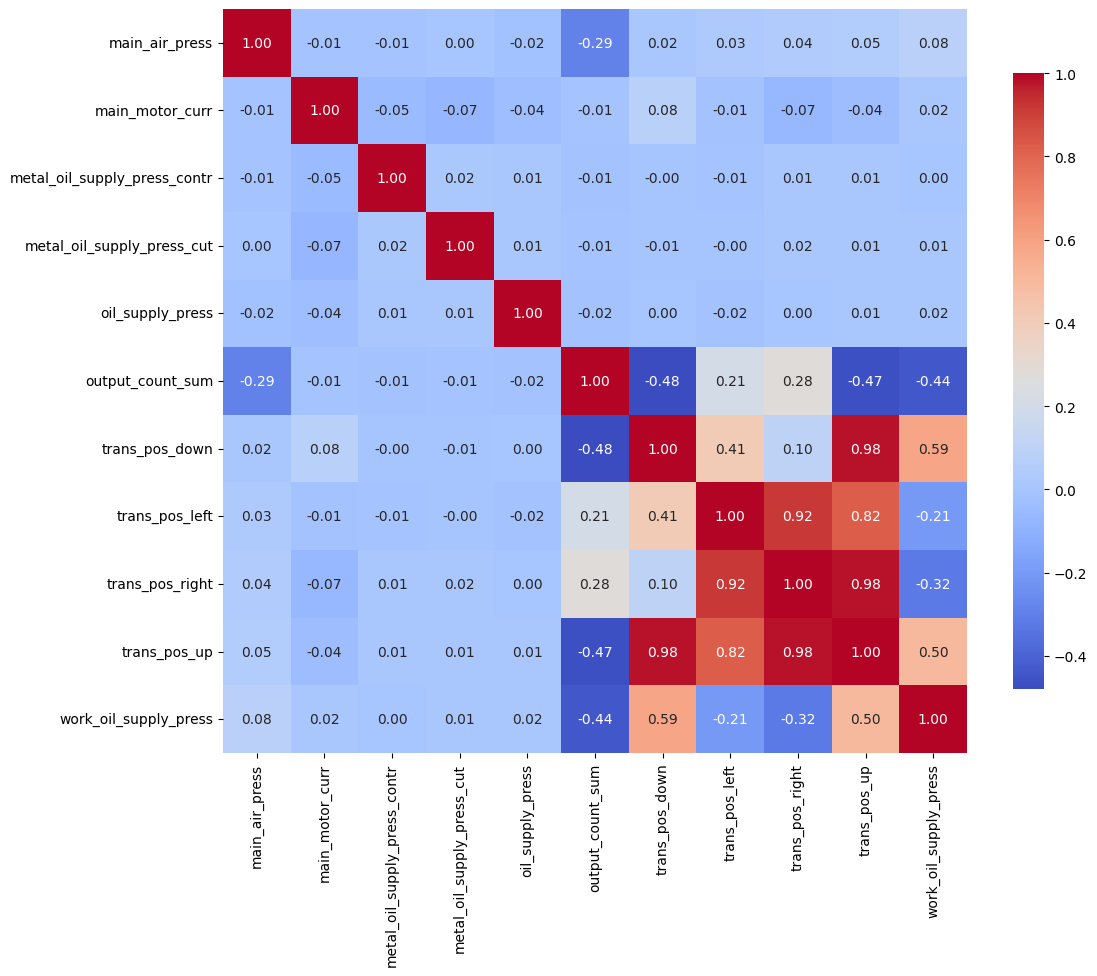

In [60]:
# 상관관계 시각화. seaborn 라이브러리 사용
plt.figure(figsize=(12, 10))
sns.heatmap(corr_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [61]:
# 상관관계가 매우 높은 컬럼은 둘 중 하나만 drop

# 상관관계의 절대값이 0.9 이상인 컬럼
# (trans_pos_up, trans_pos_down), (trans_pos_right, trans_pos_left), (trans_pos_up, trans_pos_right)
# trans_pos_up을 제외한 나머지 컬럼을 drop

X_train = X_train.drop(['trans_pos_right', 'trans_pos_left', 'trans_pos_down'], axis = 1)

In [62]:
X_train['Timestamp']

0        2022-05-12 20:01:51
1        2022-05-12 20:01:52
2        2022-05-12 20:01:53
3        2022-05-12 20:01:54
4        2022-05-12 20:01:55
                ...         
29995    2022-05-13 12:52:14
29996    2022-05-13 12:52:15
29997    2022-05-13 12:52:16
29998    2022-05-13 12:52:17
29999    2022-05-13 12:52:18
Name: Timestamp, Length: 30000, dtype: object

In [63]:
X_train['Timestamp'] = pd.to_datetime(X_train['Timestamp'])

In [64]:
X_train.set_index('Timestamp', inplace=True)

In [65]:
X_train = X_train.interpolate(method='time') # 시간 순서에 따른 선형 보간을 사용

<Axes: >

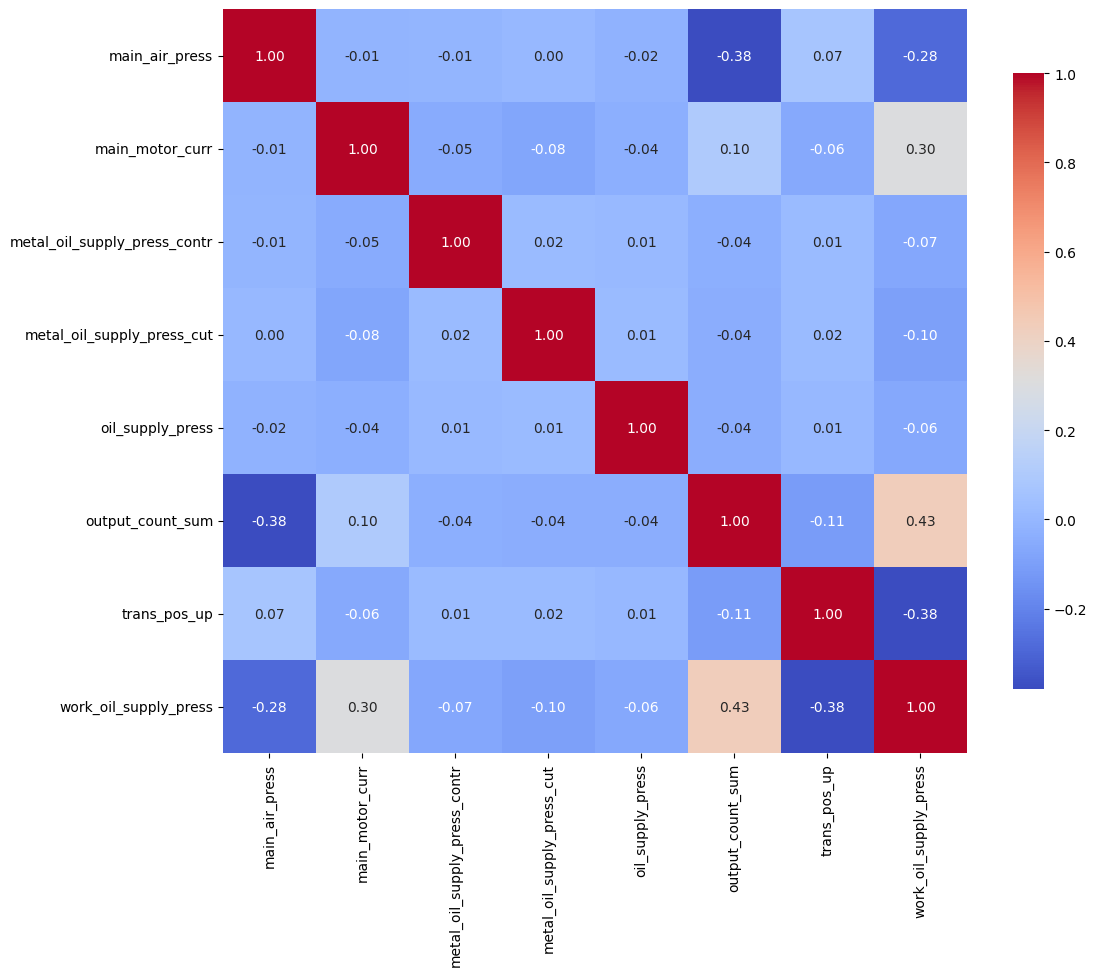

In [66]:
corr_interpolated = X_train.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_interpolated, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [67]:
X_train.isnull().sum()

main_air_press                  0
main_motor_curr                 0
metal_oil_supply_press_contr    0
metal_oil_supply_press_cut      0
oil_supply_press                0
output_count_sum                0
trans_pos_up                    0
work_oil_supply_press           0
dtype: int64

In [68]:
# 각 데이터 컬럼별로, 고윳값 존재 확인
# 확인 결과, 고윳값이 많기 때문에 OneHot Encoding을 사용하는 것은 부적절하다고 판단.
X_train.nunique()

main_air_press                   3515
main_motor_curr                  2252
metal_oil_supply_press_contr     3042
metal_oil_supply_press_cut       2853
oil_supply_press                 2661
output_count_sum                26391
trans_pos_up                     3705
work_oil_supply_press            6175
dtype: int64

In [69]:
columns = X_train.columns

In [71]:
from sklearn.preprocessing import StandardScaler
# 데이터 정규화
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train, columns=columns)

In [72]:
# 클래스 불균형이 있을까?

y_train.value_counts()

status
2.0    22244
0.0     4375
1.0     3381
Name: count, dtype: int64

In [73]:
# sklearn.model_selection 라이브러리의 train_test_split을 사용하여, train set과 validation set으로 나눈다.
# validation set은 20%로 설정하되, Cross Validation을 고려하여 random_state를 설정한다.

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 앙상블을 사용하기 위해 여러 모델을 사용한다.
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Random Forest

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_val)
print("Random Forest Accuracy: ", accuracy_score(y_val, y_pred_rf))

# Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_val)
print("Gradient Boosting Accuracy: ", accuracy_score(y_val, y_pred_gb))

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Accuracy: ", accuracy_score(y_val, y_pred_xgb))

# Voting Classifier
voting_model = VotingClassifier(estimators=[
    ('rf', rf_model),
    ('gb', gb_model),
    ('xgb', xgb_model)
], voting='soft')
voting_model.fit(X_train, y_train)
y_pred_voting = voting_model.predict(X_val)
print("Voting Classifier Accuracy: ", accuracy_score(y_val, y_pred_voting))
print(classification_report(y_val, y_pred_voting))



Random Forest Accuracy:  0.9996666666666667
Gradient Boosting Accuracy:  0.9996666666666667
XGBoost Accuracy:  0.9996666666666667
Voting Classifier Accuracy:  0.9996666666666667
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       865
         1.0       1.00      1.00      1.00       655
         2.0       1.00      1.00      1.00      4480

    accuracy                           1.00      6000
   macro avg       1.00      1.00      1.00      6000
weighted avg       1.00      1.00      1.00      6000



In [75]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# 결과 출력
print("RF Feature Importance:")
print(feature_importance)

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# 결과 출력
print("GB Feature Importance:")
print(feature_importance)


feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)
# 결과 출력
print("XGB Feature Importance:")
print(feature_importance)

RF Feature Importance:
                        Feature  Importance
1               main_motor_curr    0.230328
2  metal_oil_supply_press_contr    0.181463
3    metal_oil_supply_press_cut    0.157218
5              output_count_sum    0.133095
7         work_oil_supply_press    0.114491
6                  trans_pos_up    0.110138
0                main_air_press    0.036935
4              oil_supply_press    0.036332
GB Feature Importance:
                        Feature  Importance
1               main_motor_curr    0.349383
7         work_oil_supply_press    0.296204
6                  trans_pos_up    0.142184
5              output_count_sum    0.120315
3    metal_oil_supply_press_cut    0.090316
2  metal_oil_supply_press_contr    0.001471
0                main_air_press    0.000122
4              oil_supply_press    0.000004
XGB Feature Importance:
                        Feature  Importance
1               main_motor_curr    0.513830
7         work_oil_supply_press    0.329853
6     

## Test set

In [23]:
# Test 데이터셋에도 동일한 전처리 및 모델을 적용

test_df = pd.read_csv(os.path.join('./', 'test.csv'))

In [25]:
test_df.head()

,Timestamp,main_air_press,main_motor_curr,metal_oil_supply_press_contr,metal_oil_supply_press_cut,metal_temp_control,metal_temp_cut,oil_supply_press,output_count_sum,tongs_cast_curr,tongs_cast_set_freq,trans_pos_down,trans_pos_left,trans_pos_right,trans_pos_up,work_oil_supply_press
0,2022-05-13 12:52:19,2594.40,3889.0,318.000,299.400,41.0,40.0,475.900,77566.0,0.0,6000.0,632.5,806.5,1727.60,943.5,1867.0
1,2022-05-13 12:52:20,2590.50,3874.0,308.285,306.000,NaN,NaN,486.375,NaN,NaN,NaN,NaN,NaN,1727.33,NaN,NaN
2,2022-05-13 12:52:21,2592.28,NaN,318.777,305.333,NaN,NaN,469.888,NaN,NaN,NaN,NaN,NaN,1727.60,NaN,NaN
3,2022-05-13 12:52:22,2592.40,3867.0,326.500,302.888,NaN,NaN,473.333,NaN,NaN,NaN,NaN,NaN,1727.42,NaN,NaN
4,2022-05-13 12:52:23,2593.00,3863.0,323.444,293.222,NaN,NaN,480.444,NaN,NaN,NaN,NaN,NaN,1727.50,NaN,NaN


In [26]:
X_test = test_df.drop(['metal_temp_control', 'metal_temp_cut', 'tongs_cast_curr', 'tongs_cast_set_freq'], axis=1)
X_test['Timestamp'] = pd.to_datetime(X_test['Timestamp'])
X_test.set_index('Timestamp', inplace=True)

<Axes: >

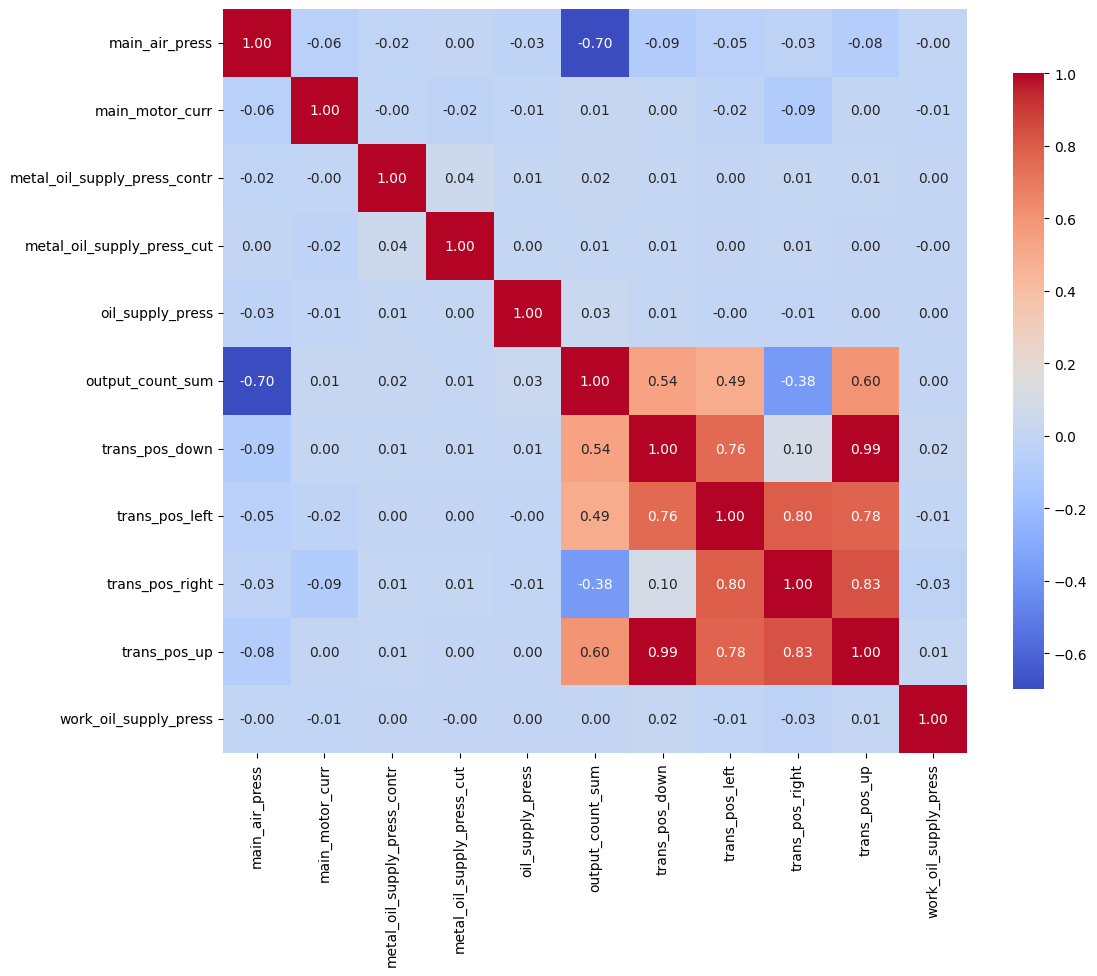

In [ ]:
test_corr = X_test.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(test_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [29]:
X_test = X_test.drop(['trans_pos_right', 'trans_pos_left', 'trans_pos_down'], axis = 1)

In [30]:
X_test.isnull().sum()
X_test = X_test.interpolate(method='time') # 시간 순서에 따른 선형 보간을 사용

In [31]:
X_test.isnull().sum()

main_air_press                  0
main_motor_curr                 0
metal_oil_supply_press_contr    0
metal_oil_supply_press_cut      0
oil_supply_press                0
output_count_sum                0
trans_pos_up                    0
work_oil_supply_press           0
dtype: int64

<Axes: >

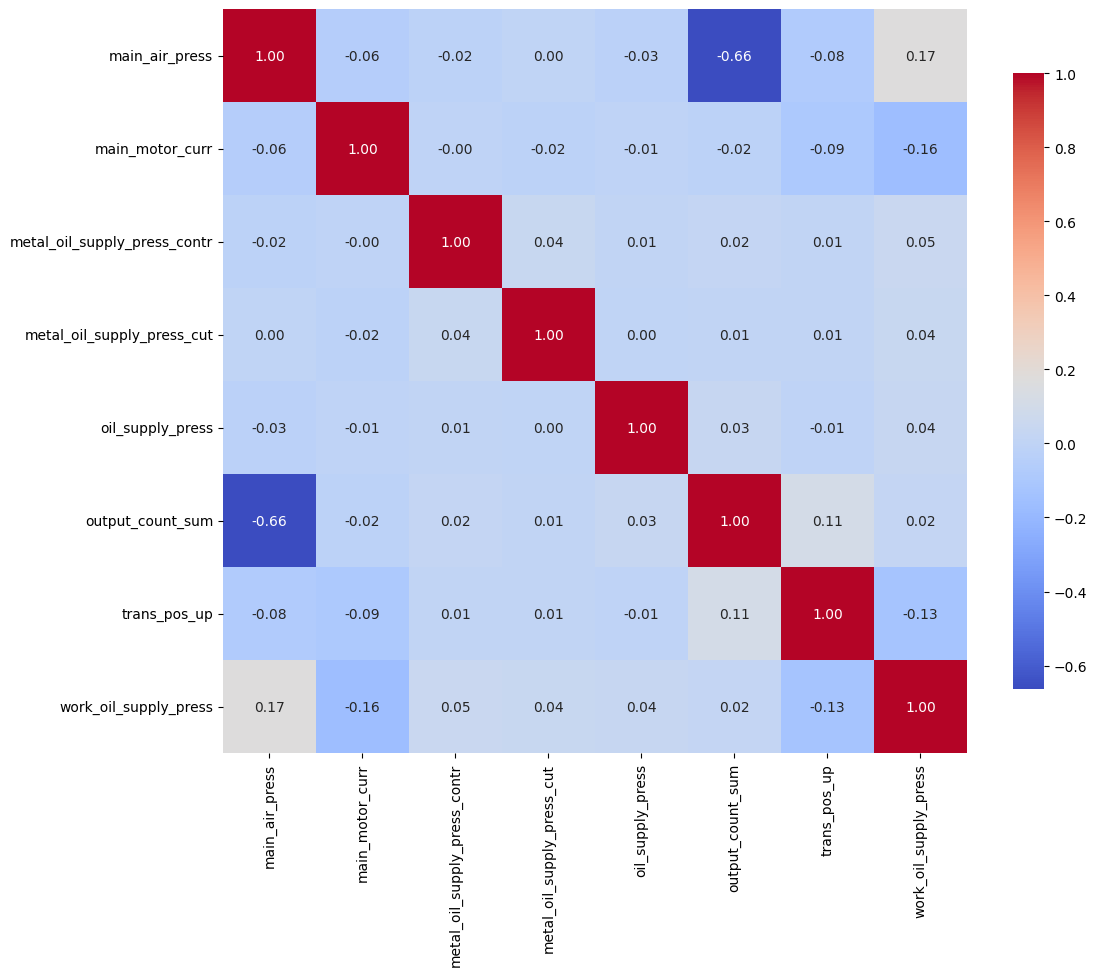

In [32]:
test_corr = X_test.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(test_corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

In [35]:
# 학습한 Voting Classifier 모델을 사용하여 예측
X_test = scaler.transform(X_test)
y_test_pred = voting_model.predict(X_test)

In [38]:
# sample-submission.csv 파일을 읽어온다.
submission_df = pd.read_csv(os.path.join('./', 'sample-submission.csv'))

In [40]:
submission_df.head()

,Unnamed: 0,status
0,0,0.0
1,1,0.0
2,2,0.0
3,3,0.0
4,4,0.0


In [41]:
submission_df.columns

Index(['Unnamed: 0', 'status'], dtype='object')

In [42]:
# y_test_pred를 status 컬럼의 데이터프레임으로 새로 만들기

my_submission = pd.DataFrame({'status': y_test_pred})

In [44]:
my_submission.to_csv('submission.csv')

In [47]:
# 제출 파일을 확인한다.
submission_df = pd.read_csv('submission.csv')
submission_df.head()

,Unnamed: 0,status
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
